# Estimating regression fits
Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We previously discussed functions that can accomplish this by showing the joint distribution of two variables. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. The functions discussed in this chapter will do so through the common framework of linear regression.

In the spirit of Tukey, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. That is to say that seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use statsmodels. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

## Functions for drawing linear regression models
The two functions that can be used to visualize a linear fit are regplot() and lmplot().

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


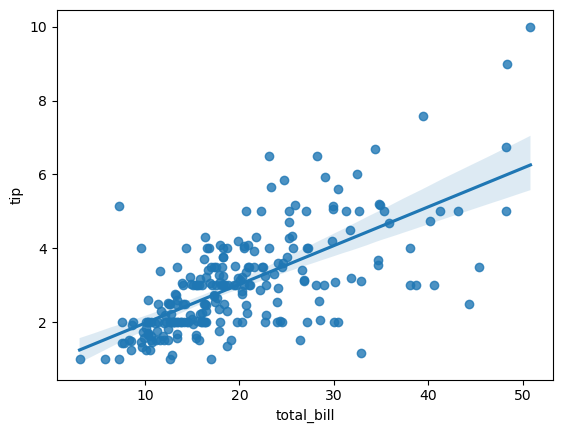

In [2]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

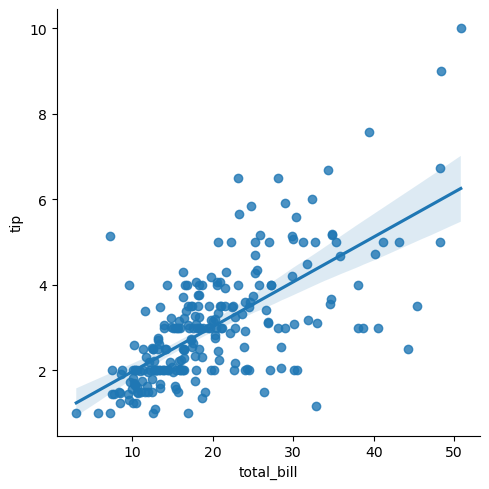

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips);

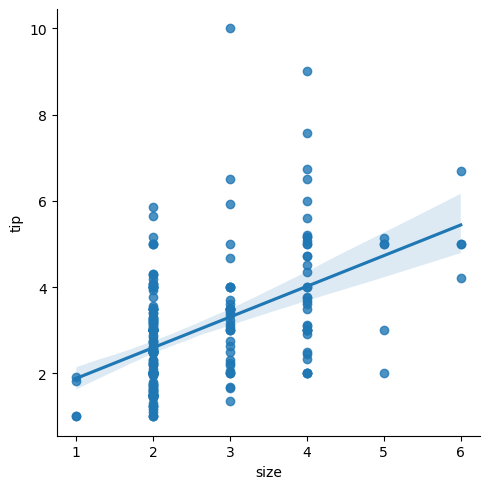

In [4]:
sns.lmplot(x="size", y="tip", data=tips);

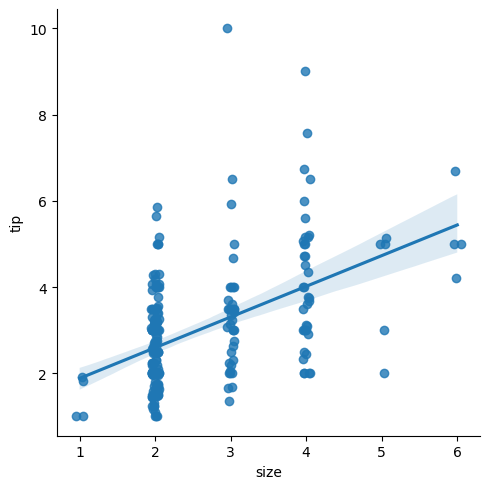

In [5]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

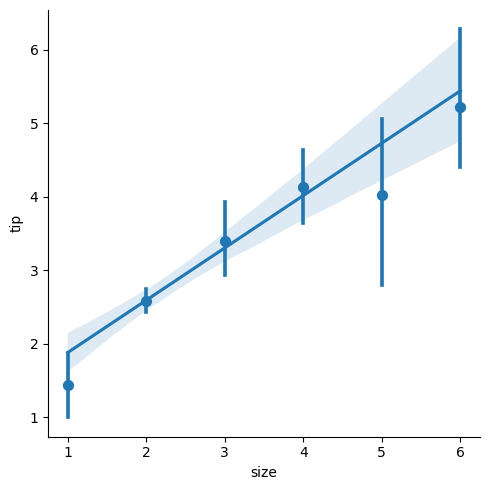

In [6]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### Fitting different kinds of models
The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model

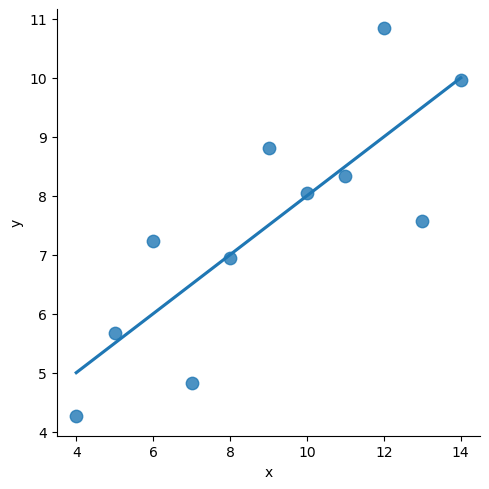

In [7]:
anscombe = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

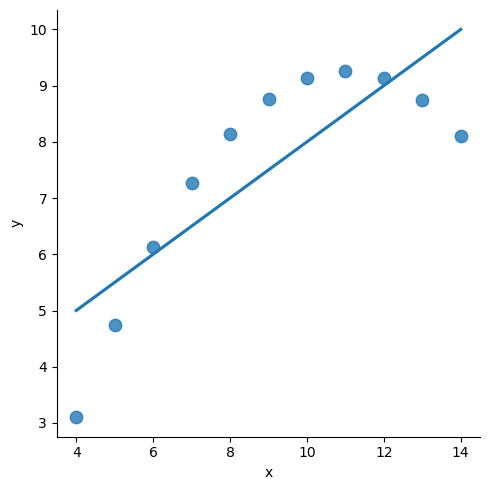

In [8]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

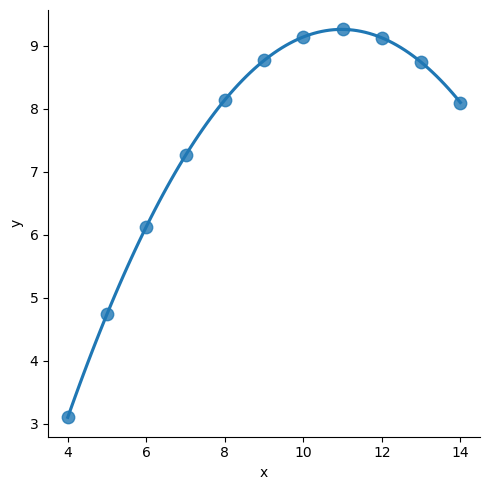

In [9]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

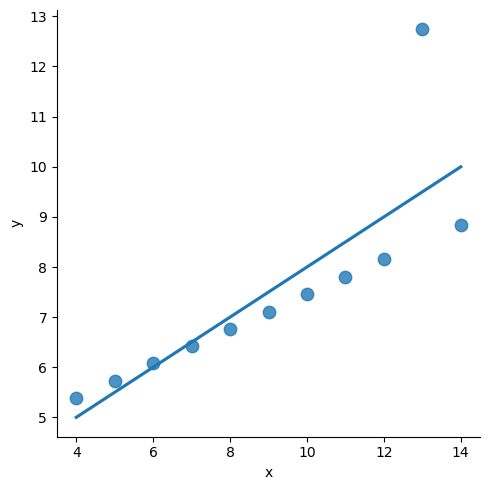

In [10]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

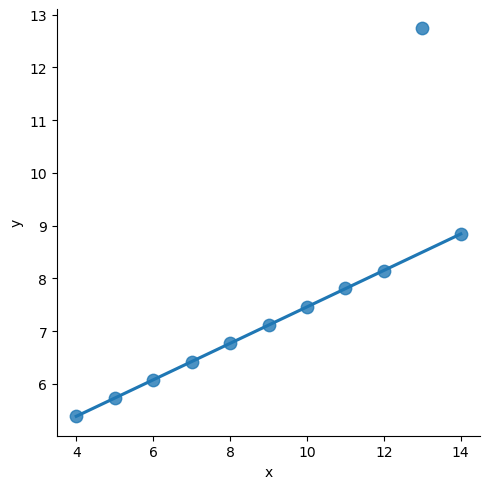

In [11]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

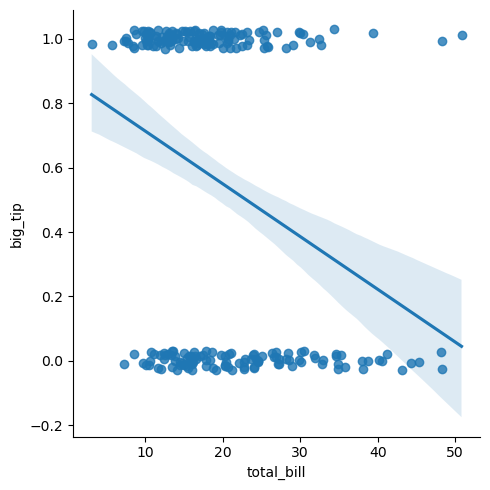

In [12]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

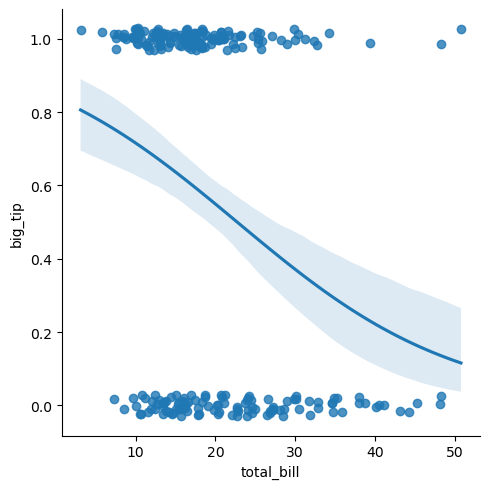

In [13]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

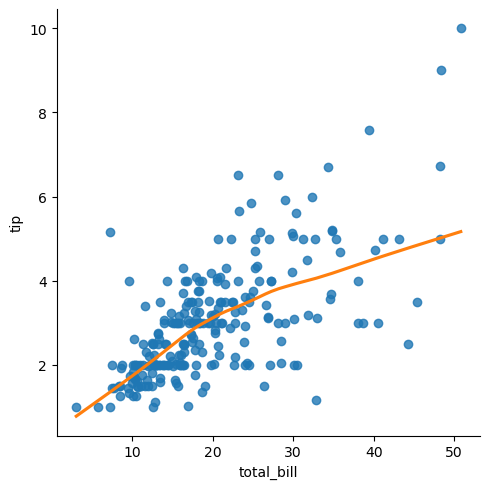

In [14]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True, line_kws={"color": "C1"});

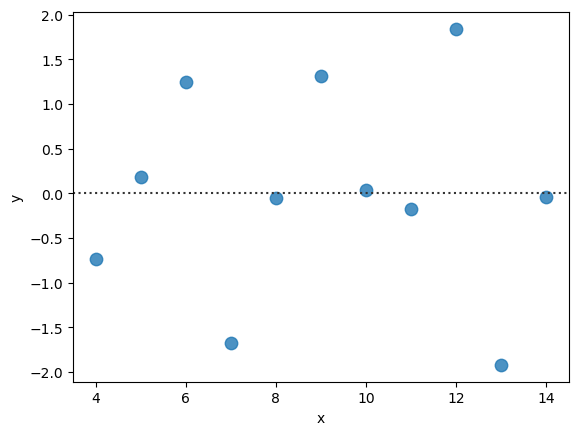

In [15]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

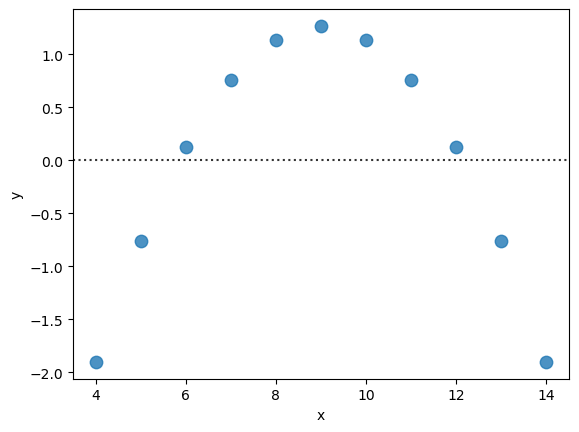

In [16]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables
The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the main differences between regplot() and lmplot() appear. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to show multiple fits using hue mapping or faceting.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them

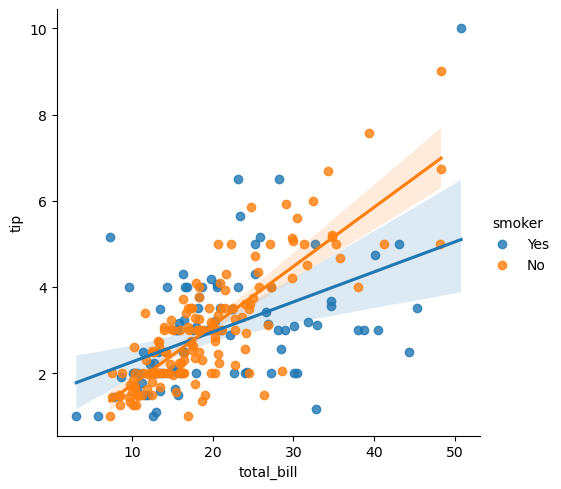

In [17]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

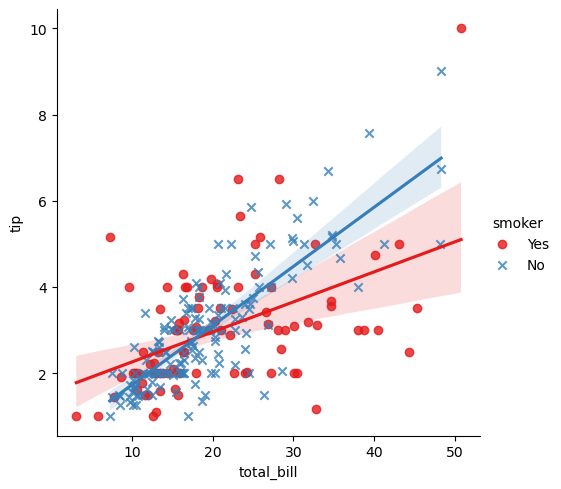

In [18]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

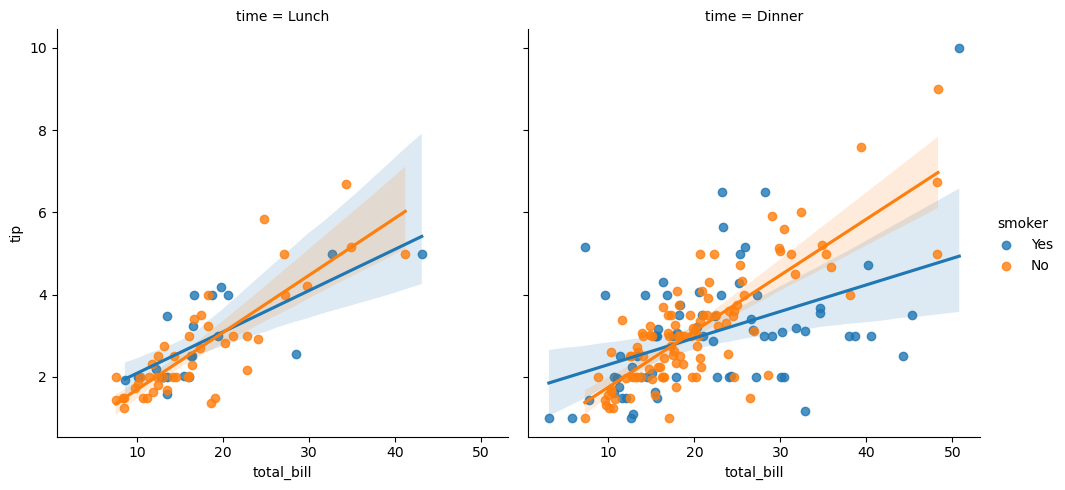

In [19]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

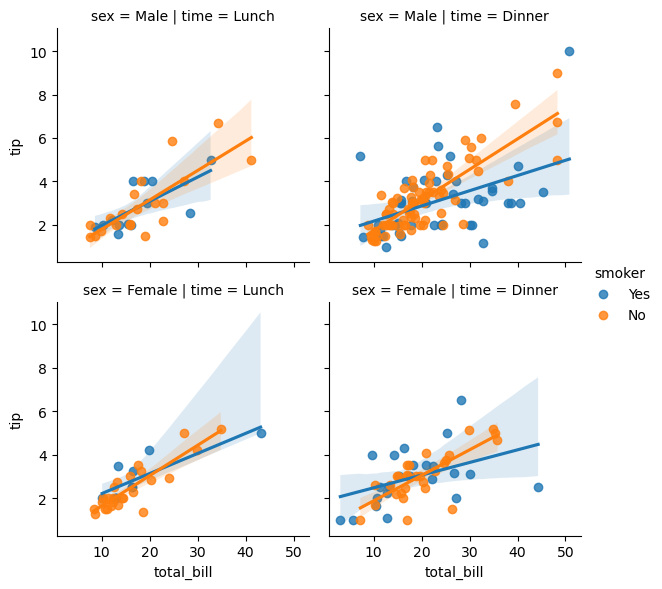

In [20]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips, height=3);

### Plotting a regression in other contexts
A few other seaborn functions use regplot() in the context of a larger, more complex plot. The first is the jointplot() function that we introduced in the distributions tutorial. In addition to the plot styles previously discussed, jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg"

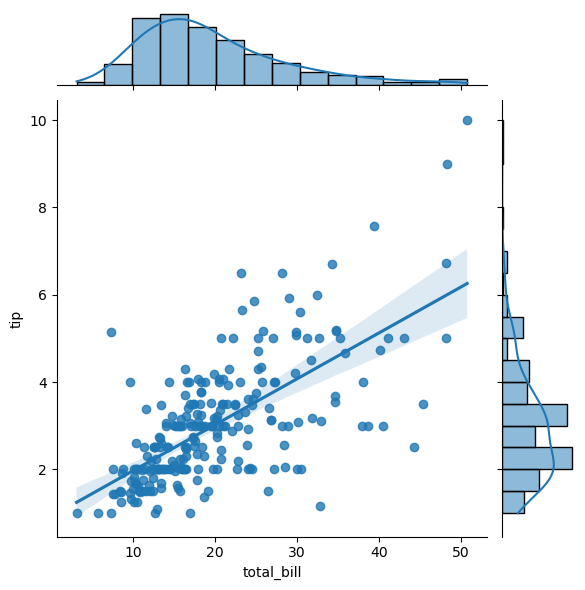

In [21]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

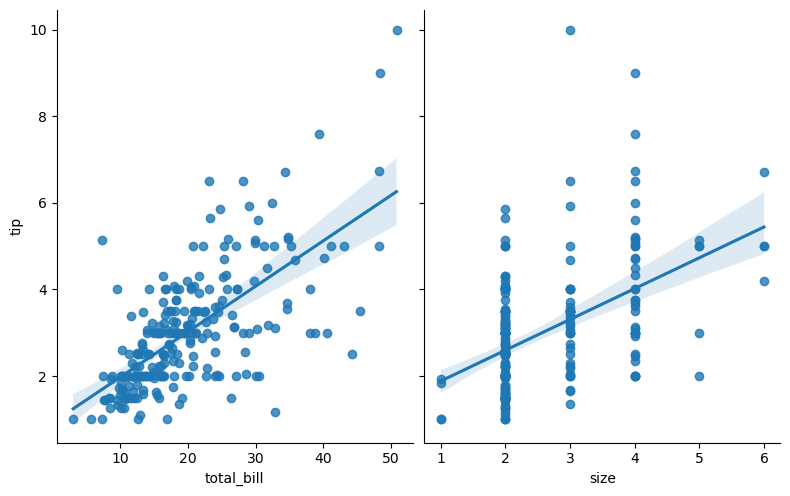

In [22]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

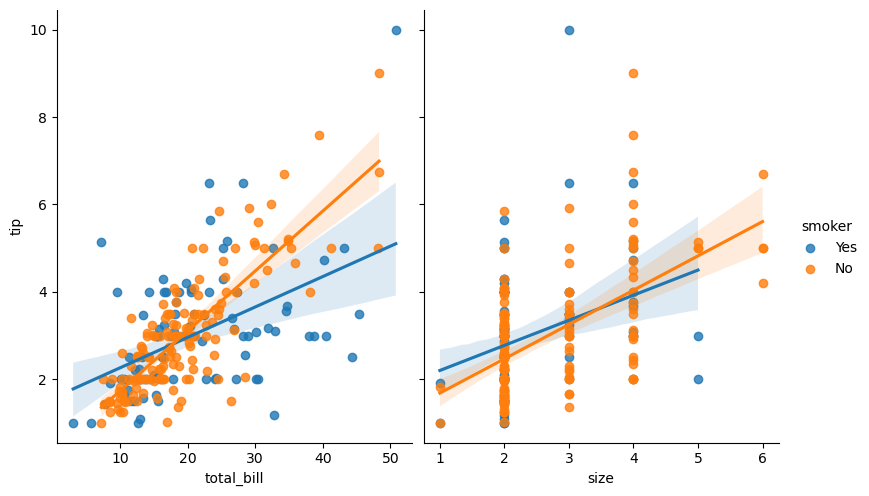

In [23]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");